## Analysis of Robinhood Portfolio (robin_$tocks)

Project by: Pete Aguirre II

In this project, I will do a retuern:risk analysis on my current Robinhood stock portfolio with the help of multiple 
tools using:
- Python 3
- Jupyter Lab/Notebook
- Beautiful Soup
- Markowitz Efficent Frontier

## TO DO LIST:
- Create a daily, weekly, quarterly, yearly portfolio performance
- Learn how to create beatiful graphs
- Create interactive dashboards 
- Learn Monte Carlo Simulations

In [63]:
# Installing libraries 
# pip install pandas
# pip install numpy
# pip install matplotlib
# pip install robin_stocks

# Libraries Used 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import robin_stocks as r 
import pyotp

from pandas_datareader import data as wb

# Magic
%matplotlib inline

## 1.) Data Collection (updated)
Notes: Log in with Robinhood and portfolio will be gathered automatically

In [ ]:
# Robinhood Log In 
email = input("Enter email: ")
password = input("Enter password: ")

totp = pyotp.TOTP("My2factorAppHere").now()
log_in = r.login(email, password, expiresIn=500, by_sms=True, mfa_code=totp)

# Get stocks value
stonks = r.build_holdings()

# Logout 
# r.logout()

In [115]:
# Company tickers
# Since the company tickers are the keys, and the other variables are values, 
# create a dataframe for symbols first.
symbols_df = []
for k in  stonks.keys():
    symbols_df.append(k)
symbols_df = np.array(symbols_df)
symbols_df = pd.DataFrame(symbols_df, columns=['Symbol'])
symbols_df

,Symbol
0,AMZN
1,AAPL
2,TSLA
3,BABA
4,JD
5,AGNC
6,KO
7,JNJ
8,ENPH


In [116]:
# Other headers 
# Create a dataframe for the other headers (which are values to the symbol keys).
# Drop some variables: percent_change, equity_change, type, and id 
# Rename the variables to something nicer looking
variables_df = pd.DataFrame.from_dict(stonks.values())
variables_df = variables_df.drop(['percent_change', 'equity_change', 'id', 'percentage'], axis=1)
variables_df = variables_df.rename(columns={'price':'Price', 'quantity':'Quantity', 'average_buy_price':'Average Price', 'equity':'Equity', 'name':'Name', 'pe_ratio':'P/E', 'type':'Type'})
variables_df

,Average Price,Equity,Name,P/E,Price,Quantity,Type
0,3281.1821,3371.95,Amazon,125.326000,3293.710000,1.02375300,stock
1,426.6150,4829.70,Apple,35.176900,482.970100,10.00000000,stock
2,1755.0300,4138.61,Tesla,977.637000,2069.305000,2.00000000,stock
3,246.0856,1296.70,Alibaba,31.953800,259.339700,5.00000000,adr
4,63.0859,297.64,JD.com,34.804300,74.410000,4.00000000,adr
5,13.9372,800.45,AGNC Investment,None,13.945000,57.40033800,reit
6,47.2683,350.02,Coca-Cola,22.277100,47.195000,7.41638600,stock
7,150.9390,921.92,Johnson & Johnson,26.433800,151.080000,6.10220100,stock
8,74.5060,373.73,Enphase Energy,61.160200,74.745000,5.00000000,stock


## 2.) Data Cleaning

In [117]:
# Concatinate both DataFrames 
my_portfolio = pd.concat([symbols_df, variables_df], axis=1)
my_portfolio

,Symbol,Average Price,Equity,Name,P/E,Price,Quantity,Type
0,AMZN,3281.1821,3371.95,Amazon,125.326000,3293.710000,1.02375300,stock
1,AAPL,426.6150,4829.70,Apple,35.176900,482.970100,10.00000000,stock
2,TSLA,1755.0300,4138.61,Tesla,977.637000,2069.305000,2.00000000,stock
3,BABA,246.0856,1296.70,Alibaba,31.953800,259.339700,5.00000000,adr
4,JD,63.0859,297.64,JD.com,34.804300,74.410000,4.00000000,adr
5,AGNC,13.9372,800.45,AGNC Investment,None,13.945000,57.40033800,reit
6,KO,47.2683,350.02,Coca-Cola,22.277100,47.195000,7.41638600,stock
7,JNJ,150.9390,921.92,Johnson & Johnson,26.433800,151.080000,6.10220100,stock
8,ENPH,74.5060,373.73,Enphase Energy,61.160200,74.745000,5.00000000,stock


In [118]:
# Check variable types
my_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
Symbol           9 non-null object
Average Price    9 non-null object
Equity           9 non-null object
Name             9 non-null object
P/E              8 non-null object
Price            9 non-null object
Quantity         9 non-null object
Type             9 non-null object
dtypes: object(8)
memory usage: 656.0+ bytes


In [119]:
# Change some values to floats and round them to 2 decimal numbers
my_portfolio['Price'] = my_portfolio['Price'].astype(float)
my_portfolio['Quantity'] = my_portfolio['Quantity'].astype(float).astype(int)
my_portfolio['Average Price'] = round(my_portfolio['Average Price'].astype(float), 2)
my_portfolio['Equity'] = round(my_portfolio['Equity'].astype(float), 2)
my_portfolio['P/E'] = round(my_portfolio['P/E'].astype(float),2)
my_portfolio

,Symbol,Average Price,Equity,Name,P/E,Price,Quantity,Type
0,AMZN,3281.18,3371.95,Amazon,125.33,3293.7100,1,stock
1,AAPL,426.62,4829.70,Apple,35.18,482.9701,10,stock
2,TSLA,1755.03,4138.61,Tesla,977.64,2069.3050,2,stock
3,BABA,246.09,1296.70,Alibaba,31.95,259.3397,5,adr
4,JD,63.09,297.64,JD.com,34.80,74.4100,4,adr
5,AGNC,13.94,800.45,AGNC Investment,NaN,13.9450,57,reit
6,KO,47.27,350.02,Coca-Cola,22.28,47.1950,7,stock
7,JNJ,150.94,921.92,Johnson & Johnson,26.43,151.0800,6,stock
8,ENPH,74.51,373.73,Enphase Energy,61.16,74.7450,5,stock


In [120]:
# Check once more
# Note: at this point, numbers should be floats
my_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
Symbol           9 non-null object
Average Price    9 non-null float64
Equity           9 non-null float64
Name             9 non-null object
P/E              8 non-null float64
Price            9 non-null float64
Quantity         9 non-null int32
Type             9 non-null object
dtypes: float64(4), int32(1), object(3)
memory usage: 620.0+ bytes


In [121]:
my_portfolio = my_portfolio[["Name","Symbol","Type","Price","Quantity","Average Price","Equity","P/E"]]
# my_portfolio

In [122]:
# Convert any '.' to '-' in symbols
my_portfolio['Symbol'] = my_portfolio['Symbol'].str.replace(".", "-")

In [123]:
# Confirm that '.' has been replaced by '-' on symbol
my_portfolio

,Name,Symbol,Type,Price,Quantity,Average Price,Equity,P/E
0,Amazon,AMZN,stock,3293.7100,1,3281.18,3371.95,125.33
1,Apple,AAPL,stock,482.9701,10,426.62,4829.70,35.18
2,Tesla,TSLA,stock,2069.3050,2,1755.03,4138.61,977.64
3,Alibaba,BABA,adr,259.3397,5,246.09,1296.70,31.95
4,JD.com,JD,adr,74.4100,4,63.09,297.64,34.80
5,AGNC Investment,AGNC,reit,13.9450,57,13.94,800.45,NaN
6,Coca-Cola,KO,stock,47.1950,7,47.27,350.02,22.28
7,Johnson & Johnson,JNJ,stock,151.0800,6,150.94,921.92,26.43
8,Enphase Energy,ENPH,stock,74.7450,5,74.51,373.73,61.16


In [124]:
# Create weights for each company
# capital = sigma(quantity * average price)
# weights = (quantity * average price)/capital

capital = np.sum(my_portfolio['Quantity']*my_portfolio['Average Price'])
weights = []

for w in range(len(my_portfolio)):
    weights.append(round(((my_portfolio['Quantity'][w] * my_portfolio['Average Price'][w])/capital), 2))

weights_df = np.array(weights)
weights_df = pd.DataFrame({'Weights':weights})

np.sum(weights_df)



Weights    0.99
dtype: float64

In [125]:
# Ensure that these are the only variables included
my_portfolio = pd.concat([my_portfolio, weights_df], axis=1)
my_portfolio.to_excel("portfolio.xlsx")
my_portfolio

,Name,Symbol,Type,Price,Quantity,Average Price,Equity,P/E,Weights
0,Amazon,AMZN,stock,3293.7100,1,3281.18,3371.95,125.33,0.22
1,Apple,AAPL,stock,482.9701,10,426.62,4829.70,35.18,0.29
2,Tesla,TSLA,stock,2069.3050,2,1755.03,4138.61,977.64,0.23
3,Alibaba,BABA,adr,259.3397,5,246.09,1296.70,31.95,0.08
4,JD.com,JD,adr,74.4100,4,63.09,297.64,34.80,0.02
5,AGNC Investment,AGNC,reit,13.9450,57,13.94,800.45,NaN,0.05
6,Coca-Cola,KO,stock,47.1950,7,47.27,350.02,22.28,0.02
7,Johnson & Johnson,JNJ,stock,151.0800,6,150.94,921.92,26.43,0.06
8,Enphase Energy,ENPH,stock,74.7450,5,74.51,373.73,61.16,0.02


## 3.) Data Collection of Historical Prices

In [126]:
# Collect historical prices by Yahoo! Finance est. 2000 
tickers = my_portfolio['Symbol']
start_date = '2000-01-01'
historical_data = pd.DataFrame()
for t in tickers:
    historical_data[t] = wb.DataReader(t, data_source='yahoo', start=start_date)['Adj Close']

In [127]:
# Remove all rows that includes NaN values
# Check if all columns match and are float variables
historical_data = historical_data.dropna()
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1492 entries, 2014-09-19 to 2020-08-21
Data columns (total 9 columns):
AMZN    1492 non-null float64
AAPL    1492 non-null float64
TSLA    1492 non-null float64
BABA    1492 non-null float64
JD      1492 non-null float64
AGNC    1492 non-null float64
KO      1492 non-null float64
JNJ     1492 non-null float64
ENPH    1492 non-null float64
dtypes: float64(9)
memory usage: 116.6 KB


In [128]:
np.array([tickers])

array([['AMZN', 'AAPL', 'TSLA', 'BABA', 'JD', 'AGNC', 'KO', 'JNJ',
        'ENPH']], dtype=object)

In [129]:
historical_data.head()

,AMZN,AAPL,TSLA,BABA,JD,AGNC,KO,JNJ,ENPH
Date,,,,,,,,,
2014-09-19,331.320007,91.730469,259.320007,93.889999,28.350000,11.025264,34.855675,92.295212,16.850000
2014-09-22,324.500000,91.821304,250.029999,89.889999,26.969999,10.922181,34.996582,92.201202,16.059999
2014-09-23,323.630005,93.256874,250.410004,87.169998,26.570000,10.882905,34.723049,91.842239,15.580000
2014-09-24,328.209991,92.448242,252.139999,90.570000,27.180000,10.843635,35.038040,92.850746,14.740000
2014-09-25,321.929993,88.922958,246.949997,88.919998,26.570000,10.848540,34.631866,91.534569,13.980000


In [130]:
historical_data.tail()

,AMZN,AAPL,TSLA,BABA,JD,AGNC,KO,JNJ,ENPH
Date,,,,,,,,,
2020-08-17,3182.409912,458.429993,1835.640015,256.959991,66.980003,13.80,48.209999,148.990005,75.059998
2020-08-18,3312.489990,462.250000,1887.089966,259.200012,70.320000,13.88,48.419998,150.089996,75.160004
2020-08-19,3260.479980,462.829987,1878.530029,260.589996,72.559998,13.94,47.369999,150.389999,75.489998
2020-08-20,3297.370117,473.100006,2001.829956,257.970001,73.940002,13.94,47.349998,151.419998,73.089996
2020-08-21,3290.979980,482.720001,2067.800049,259.160004,74.311996,13.95,47.200001,151.089706,74.690002


In [131]:
historical_data.to_excel("portfolio_adj_close_historical.xlsx")

In [132]:
# Calculate log returns of each companies 
# Check if all columns match and are float variables
returns = np.log(historical_data/historical_data.shift(1))
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1492 entries, 2014-09-19 to 2020-08-21
Data columns (total 9 columns):
AMZN    1491 non-null float64
AAPL    1491 non-null float64
TSLA    1491 non-null float64
BABA    1491 non-null float64
JD      1491 non-null float64
AGNC    1491 non-null float64
KO      1491 non-null float64
JNJ     1491 non-null float64
ENPH    1491 non-null float64
dtypes: float64(9)
memory usage: 116.6 KB


In [133]:
returns.head()

,AMZN,AAPL,TSLA,BABA,JD,AGNC,KO,JNJ,ENPH
Date,,,,,,,,,
2014-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-22,-0.020799,0.000990,-0.036482,-0.043537,-0.049902,-0.009394,0.004034,-0.001019,-0.048019
2014-09-23,-0.002685,0.015513,0.001519,-0.030726,-0.014942,-0.003602,-0.007847,-0.003901,-0.030344
2014-09-24,0.014053,-0.008709,0.006885,0.038263,0.022699,-0.003615,0.009031,0.010921,-0.055423
2014-09-25,-0.019320,-0.038879,-0.020799,-0.018386,-0.022699,0.000452,-0.011660,-0.014277,-0.052937


In [134]:
returns.tail()

,AMZN,AAPL,TSLA,BABA,JD,AGNC,KO,JNJ,ENPH
Date,,,,,,,,,
2020-08-17,0.010865,-0.002614,0.106188,0.011704,0.076292,-0.005780,-0.004966,0.005047,0.025639
2020-08-18,0.040061,0.008298,0.027643,0.008680,0.048662,0.005780,0.004346,0.007356,0.001331
2020-08-19,-0.015826,0.001254,-0.004546,0.005348,0.031358,0.004313,-0.021924,0.001997,0.004381
2020-08-20,0.011251,0.021947,0.063572,-0.010105,0.018840,0.000000,-0.000422,0.006826,-0.032309
2020-08-21,-0.001940,0.020130,0.032424,0.004602,0.005018,0.000717,-0.003173,-0.002184,0.021655


In [135]:
returns.to_excel("portfolio_roi.xlsx")

## 4.) Data Analysis

In [136]:
# Create a table for Daily and Annual Risk Returns 
# Daily mean formula: daily_mean = returns.mean()
# Daily stdv formula: daily_mean = returns.std()
# Annual mean formula: annual_mean = returns.mean()*250
# Annual stdv formula: annual_mean = returns.std()*250 ** .5

daily_mean = []
daily_stdv = []

annual_mean = []
annual_stdv = []

for t in tickers:
    daily_mean.append(round(returns[t].mean()*100, 2))
    daily_stdv.append(round(returns[t].std()*100, 2))
    
    annual_mean.append(round((returns[t].mean()*250)*100, 2))
    annual_stdv.append(round((returns[t].std()*250**.5)*100, 2))

daily_mean = np.array(daily_mean)
daily_stdv = np.array(daily_stdv)
annual_mean = np.array(annual_mean)
annual_stdv = np.array(annual_stdv)
annual_stdv

array([30.24, 28.44, 52.45, 32.55, 41.4 , 23.98, 18.98, 19.31, 89.42])

In [137]:
# Create DataFrame for returns and risk 
returns_data = pd.DataFrame({'Symbol':tickers, 
                             'Daily Average Return (%)':daily_mean,
                             'Daily Risk (%)':daily_stdv,
                             'Annual Average Return (%)':annual_mean,
                             'Annual Risk (%)':annual_stdv
                            })
returns_data

,Symbol,Daily Average Return (%),Daily Risk (%),Annual Average Return (%),Annual Risk (%)
0,AMZN,0.15,1.91,38.50,30.24
1,AAPL,0.11,1.80,27.84,28.44
2,TSLA,0.14,3.32,34.81,52.45
3,BABA,0.07,2.06,17.02,32.55
4,JD,0.06,2.62,16.16,41.40
5,AGNC,0.02,1.52,3.95,23.98
6,KO,0.02,1.20,5.08,18.98
7,JNJ,0.03,1.22,8.26,19.31
8,ENPH,0.10,5.66,24.97,89.42


In [138]:
# Returns the lowest return in history between 09-30-2014 to now
returns.idxmin() 

AMZN   2014-10-24
AAPL   2020-03-16
TSLA   2020-03-16
BABA   2015-01-29
JD     2020-03-16
AGNC   2020-03-12
KO     2020-03-12
JNJ    2018-12-14
ENPH   2015-11-04
dtype: datetime64[ns]

In [139]:
# Returns the highest return in history between 09-30-2014 to now
returns.idxmax()

AMZN   2015-04-24
AAPL   2020-03-13
TSLA   2020-02-03
BABA   2017-06-08
JD     2019-08-13
AGNC   2020-03-25
KO     2020-04-06
JNJ    2020-03-30
ENPH   2020-02-19
dtype: datetime64[ns]

In [140]:
# Calculate Weighted Returns 
weights = np.array([my_portfolio['Weights']])
weighted_returns = ( weights * returns)

In [141]:
weighted_returns.head()

,AMZN,AAPL,TSLA,BABA,JD,AGNC,KO,JNJ,ENPH
Date,,,,,,,,,
2014-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-22,-0.004576,0.000287,-0.008391,-0.003483,-0.000998,-0.000470,0.000081,-0.000061,-0.000960
2014-09-23,-0.000591,0.004499,0.000349,-0.002458,-0.000299,-0.000180,-0.000157,-0.000234,-0.000607
2014-09-24,0.003092,-0.002526,0.001584,0.003061,0.000454,-0.000181,0.000181,0.000655,-0.001108
2014-09-25,-0.004250,-0.011275,-0.004784,-0.001471,-0.000454,0.000023,-0.000233,-0.000857,-0.001059


In [142]:
# Covariance daily
# Determines if there is a relationship between two stocks, whether they move together:
# positively, negatively, or neutral 
return_cov = returns.cov()
return_cov

,AMZN,AAPL,TSLA,BABA,JD,AGNC,KO,JNJ,ENPH
AMZN,0.000366,0.000184,0.000230,0.000189,0.000224,0.000051,0.000057,0.000077,0.000215
AAPL,0.000184,0.000324,0.000223,0.000172,0.000212,0.000078,0.000087,0.000096,0.000280
TSLA,0.000230,0.000223,0.001100,0.000222,0.000297,0.000113,0.000090,0.000077,0.000419
BABA,0.000189,0.000172,0.000222,0.000424,0.000337,0.000051,0.000055,0.000069,0.000265
JD,0.000224,0.000212,0.000297,0.000337,0.000686,0.000061,0.000070,0.000085,0.000297
AGNC,0.000051,0.000078,0.000113,0.000051,0.000061,0.000230,0.000078,0.000043,0.000172
KO,0.000057,0.000087,0.000090,0.000055,0.000070,0.000078,0.000144,0.000076,0.000097
JNJ,0.000077,0.000096,0.000077,0.000069,0.000085,0.000043,0.000076,0.000149,0.000079
ENPH,0.000215,0.000280,0.000419,0.000265,0.000297,0.000172,0.000097,0.000079,0.003198


In [143]:
# Covariance yearly
# Determines if there is a relationship between two stocks, whether they move together:
# positively, negatively, or neutral 
return_cov = returns.cov()*250
return_cov

,AMZN,AAPL,TSLA,BABA,JD,AGNC,KO,JNJ,ENPH
AMZN,0.091417,0.045913,0.057531,0.047183,0.056114,0.012751,0.014189,0.019231,0.053858
AAPL,0.045913,0.080883,0.055712,0.043112,0.052955,0.019623,0.021777,0.023965,0.070110
TSLA,0.057531,0.055712,0.275084,0.055556,0.074271,0.028174,0.022570,0.019194,0.104666
BABA,0.047183,0.043112,0.055556,0.105946,0.084258,0.012867,0.013672,0.017156,0.066246
JD,0.056114,0.052955,0.074271,0.084258,0.171413,0.015304,0.017378,0.021180,0.074359
AGNC,0.012751,0.019623,0.028174,0.012867,0.015304,0.057486,0.019596,0.010691,0.042961
KO,0.014189,0.021777,0.022570,0.013672,0.017378,0.019596,0.036024,0.018998,0.024159
JNJ,0.019231,0.023965,0.019194,0.017156,0.021180,0.010691,0.018998,0.037274,0.019632
ENPH,0.053858,0.070110,0.104666,0.066246,0.074359,0.042961,0.024159,0.019632,0.799563


In [144]:
# Correlations
# Determines how close the relationship are between two stocks
return_corr = returns.corr()
return_corr

,AMZN,AAPL,TSLA,BABA,JD,AGNC,KO,JNJ,ENPH
AMZN,1.000000,0.533938,0.362790,0.479433,0.448265,0.175892,0.247251,0.329442,0.199210
AAPL,0.533938,1.000000,0.373496,0.465719,0.449732,0.287785,0.403439,0.436466,0.275692
TSLA,0.362790,0.373496,1.000000,0.325428,0.342029,0.224042,0.226729,0.189549,0.223176
BABA,0.479433,0.465719,0.325428,1.000000,0.625238,0.164872,0.221306,0.273013,0.227610
JD,0.448265,0.449732,0.342029,0.625238,1.000000,0.154173,0.221151,0.264971,0.200857
AGNC,0.175892,0.287785,0.224042,0.164872,0.154173,1.000000,0.430621,0.230970,0.200387
KO,0.247251,0.403439,0.226729,0.221306,0.221151,0.430621,1.000000,0.518447,0.142349
JNJ,0.329442,0.436466,0.189549,0.273013,0.264971,0.230970,0.518447,1.000000,0.113719
ENPH,0.199210,0.275692,0.223176,0.227610,0.200857,0.200387,0.142349,0.113719,1.000000


In [145]:
# Calculating Diversifiable and Non-Diversifiable

# Portfolio Return
portfolio_return = weighted_returns.sum(axis=1)
print("Portfolio Return (10 days)", portfolio_return.mean()*10)
print("Portfolio Return (252 days)", portfolio_return.mean()*252)
print("Portfolio Return (756 days)", portfolio_return.mean()*756)

print("")

# Portfolio variance
pflio_var = np.sqrt(np.dot(my_portfolio['Weights'].T, np.dot(returns.cov()*10, my_portfolio['Weights'])))
print("Portfolio Volatility (10 days)", pflio_var)
pflio_var = np.sqrt(np.dot(my_portfolio['Weights'].T, np.dot(returns.cov()*252, my_portfolio['Weights'])))
print("Portfolio Volatility (252 days)", pflio_var)
pflio_var = np.sqrt(np.dot(my_portfolio['Weights'].T, np.dot(returns.cov()*756, my_portfolio['Weights'])))
print("Portfolio Volatility (756 days)", pflio_var)

# print("Portfolio Variance", pflio_var)

# Portfolio volatility 
#pflio_vol = (np.dot(my_portfolio['Weight'].T, np.dot(sec_returns.cov()*250, my_portfolio['Weight'])))**.5
#print("Portfolio Volatility:", pflio_vol)

# or...

#pflio_vol2 = np.sqrt(pflio_var)
#print("Portfolio Volatility:", pflio_vol2)


# Calculating variance annually for each tickers
var_a = []
for t in tickers:
    var_a.append(returns[t].var()*250)

var_a = np.array(var_a)
variances = pd.DataFrame({'Symbol':tickers, 'Variance':var_a})
print("")
# Diversifiable Risk
# div_risk = pflio_var - my_portfolio['Weight'][0]**2*variances['Variance'][0] - ...
#                  ... - my_portfolio['Weight'][n]**2*variances['Variance'][n]
div_risk = 0   
for i in range(len(my_portfolio)):
    if i==0:
        div_risk = pflio_var - my_portfolio['Weights'][0]**2*variances['Variance'][0]
    else:
        div_risk -= my_portfolio['Weights'][i]**2*variances['Variance'][i]
print("Diversifiable Risk:", round(div_risk,2)*100, "%")

#print("")
# Non Diversifiable Risk
non_div_risk1 = pflio_var - div_risk
non_div_risk1 = round(non_div_risk1, 4)*100
# print("Non-Diversifiable Risk:", non_div_risk1)

#print("")
non_div_risk2 = 0
for i in range(len(my_portfolio)):
    non_div_risk2 += my_portfolio['Weights'][i]**2*variances['Variance'][i]

    
print("")
non_div_risk2 = round(non_div_risk2, 4)*100
print("Non-Diversifiable Risk:", non_div_risk2, "%")
print("Non-Diversifiable Risk:", non_div_risk2 == non_div_risk1)

Portfolio Return (10 days) 0.011004407052704002
Portfolio Return (252 days) 0.2773110577281408
Portfolio Return (756 days) 0.8319331731844225

Portfolio Volatility (10 days) 0.0494774801700552
Portfolio Volatility (252 days) 0.2483749792315055
Portfolio Volatility (756 days) 0.4301980833578322

Diversifiable Risk: 40.0 %

Non-Diversifiable Risk: 2.71 %
Non-Diversifiable Risk: False


In [146]:
no_assets = len(tickers)
no_assets

9

In [147]:
pflio_ret = []
pflio_vol = [] 
pflio_wei = []

for x in range(10000):
    weights = np.random.random(no_assets)
    weights /= np.sum(weights)
    
    pflio_wei.append(weights)
    pflio_ret.append(np.sum(weights*returns.mean())*250)
    pflio_vol.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov()*250, weights))))
    #print(x, weights)

pflio_wei = np.array(pflio_wei)
pflio_ret = np.array(pflio_ret)
pflio_vol = np.array(pflio_vol)

print(np.sum(weights))
#pflio_returns, pflio_volatilities

1.0


In [148]:
pflio_scenarios = pd.DataFrame({'Return': pflio_ret, 'Volatility': pflio_vol})
#pflio_scenarios = pflio_scenarios.sort_values('Return', ascending=True)

In [149]:
pflio_scenarios.head()
#pflio_scenarios['Return']

,Return,Volatility
0,0.203509,0.225576
1,0.220521,0.273041
2,0.189711,0.302010
3,0.203133,0.234492
4,0.179359,0.224259


In [150]:
pflio_scenarios.tail(10)

,Return,Volatility
9990,0.144878,0.210572
9991,0.181331,0.206472
9992,0.218523,0.258526
9993,0.242126,0.313703
9994,0.234132,0.284550
9995,0.219300,0.260172
9996,0.193235,0.250626
9997,0.198754,0.248574
9998,0.155419,0.186046
9999,0.199316,0.259735


In [163]:
for i in range(10000):
    if pflio_scenarios['Return'][i] >= 0.25 and pflio_scenarios['Volatility'][i] < 0.23:
        print(pflio_scenarios.iloc[i])

Return        0.268684
Volatility    0.228685
Name: 1275, dtype: float64
Return        0.269775
Volatility    0.229300
Name: 4479, dtype: float64
Return        0.252792
Volatility    0.225966
Name: 6374, dtype: float64
Return        0.258125
Volatility    0.223213
Name: 6665, dtype: float64
Return        0.250392
Volatility    0.225443
Name: 8156, dtype: float64


In [164]:
# For Testing purposes
index = 1275
#index = len(pflio_scenarios)-1
pfolio_wei2 = []
tickers2 = []
tickers2 = np.array(tickers)
print(index)
print(np.sum(pflio_wei[index]))
pflio_wei2 = pflio_wei[index]



ideal_portfolio = pd.DataFrame({'Original Weights':my_portfolio['Weights'], 'Ideal Weights': pflio_wei2})
ideal_portfolio = pd.concat([symbols_df, ideal_portfolio], axis=1)
ideal_portfolio = ideal_portfolio.sort_values('Ideal Weights', ascending=False)
ideal_portfolio.to_csv('ideal_weights.csv', index=False)
ideal_portfolio

1275
1.0


,Symbol,Original Weights,Ideal Weights
0,AMZN,0.22,0.287631
1,AAPL,0.29,0.270325
2,TSLA,0.23,0.173430
6,KO,0.02,0.152865
7,JNJ,0.06,0.052755
3,BABA,0.08,0.030799
8,ENPH,0.02,0.013327
5,AGNC,0.05,0.011723
4,JD,0.02,0.007144


In [166]:
capital = 16000
price = []
for i in range(len(pflio_wei2)):
    price.append(round(capital*pflio_wei2[i],2))
price = np.array(price)
price_portfolio = pd.DataFrame({'Price':price, 'Weight':pflio_wei2})
ideal_portfolio = pd.concat([tickers, price_portfolio], axis=1)
ideal_portfolio = ideal_portfolio.sort_values('Price', ascending=False)
ideal_portfolio

,Symbol,Price,Weight
0,AMZN,4602.09,0.287631
1,AAPL,4325.20,0.270325
2,TSLA,2774.89,0.173430
6,KO,2445.84,0.152865
7,JNJ,844.09,0.052755
3,BABA,492.78,0.030799
8,ENPH,213.23,0.013327
5,AGNC,187.57,0.011723
4,JD,114.30,0.007144


In [167]:
# Calculating Diversifiable and Non-Diversifiable

# Portfolio Return
portfolio_return = weighted_returns.sum(axis=1)
print("Portfolio Return (10 days)", portfolio_return.mean()*10)
print("Portfolio Return (252 days)", portfolio_return.mean()*252)
print("Portfolio Return (756 days)", portfolio_return.mean()*756)

print("")

# Portfolio variance
pflio_var = np.sqrt(np.dot(pflio_wei2.T, np.dot(returns.cov()*10, pflio_wei2)))
print("Portfolio Volatility (10 days)", pflio_var)
pflio_var = np.sqrt(np.dot(pflio_wei2.T, np.dot(returns.cov()*252, pflio_wei2)))
print("Portfolio Volatility (252 days)", pflio_var)
pflio_var = np.sqrt(np.dot(pflio_wei2.T, np.dot(returns.cov()*756, pflio_wei2)))
print("Portfolio Volatility (756 days)", pflio_var)

# print("Portfolio Variance", pflio_var)

# Portfolio volatility 
#pflio_vol = (np.dot(my_portfolio['Weight'].T, np.dot(sec_returns.cov()*250, my_portfolio['Weight'])))**.5
#print("Portfolio Volatility:", pflio_vol)

# or...

#pflio_vol2 = np.sqrt(pflio_var)
#print("Portfolio Volatility:", pflio_vol2)


# Calculating variance annually for each tickers
var_a = []
for t in tickers:
    var_a.append(returns[t].var()*250)

var_a = np.array(var_a)
variances = pd.DataFrame({'Symbol':tickers, 'Variance':var_a})
print("")
# Diversifiable Risk
# div_risk = pflio_var - my_portfolio['Weight'][0]**2*variances['Variance'][0] - ...
#                  ... - my_portfolio['Weight'][n]**2*variances['Variance'][n]
div_risk = 0   
for i in range(len(tickers)):
    if i==0:
        div_risk = pflio_var - pflio_wei2[0]**2*variances['Variance'][0]
    else:
        div_risk -= pflio_wei2[i]**2*variances['Variance'][i]
print("Diversifiable Risk:", round(div_risk,2)*100, "%")

#print("")
# Non Diversifiable Risk
non_div_risk1= 0
non_div_risk1 = pflio_var - div_risk
non_div_risk1 = round(non_div_risk1, 4)
# print("Non-Diversifiable Risk:", non_div_risk1)

#print("")
non_div_risk2 = 0
for i in range(len(tickers)):
    non_div_risk2 += pflio_wei2[i]**2*variances['Variance'][i]

    
print("")
non_div_risk2 = round(non_div_risk2, 4)*100
print("Non-Diversifiable Risk:", non_div_risk2, "%")
print("Non-Diversifiable Risk:", non_div_risk2 == non_div_risk1)

Portfolio Return (10 days) 0.011004407052704002
Portfolio Return (252 days) 0.2773110577281408
Portfolio Return (756 days) 0.8319331731844225

Portfolio Volatility (10 days) 0.04573704243885011
Portfolio Volatility (252 days) 0.22959813084287078
Portfolio Volatility (756 days) 0.3976756279426991

Diversifiable Risk: 37.0 %

Non-Diversifiable Risk: 2.3 %
Non-Diversifiable Risk: False


Text(0, 0.5, 'Expected Return')

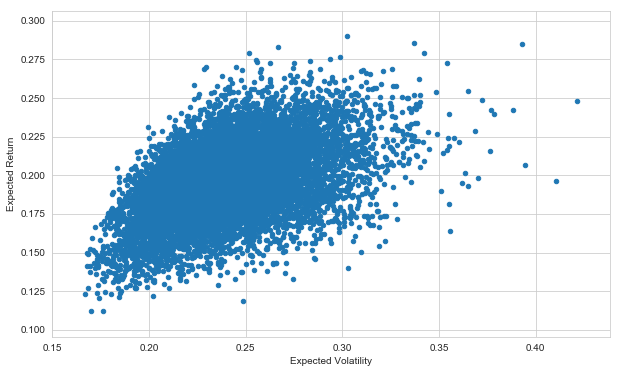

In [155]:
# Efficient Frontier 
pflio_scenarios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

## Best Results so far:
- 30% Return, 25% Volatility: 
    - AMZN - 0.425584
    - AAPL - 0.382721
    - TSLA - 0.098763
    - SPHD - 0.045753
    - JD - 0.035752
    - BABA - 0.011428
    
    
- 31% Return, 25% Volatility:
    - AMZN - 0.727883
    - SPHD - 0.169791
    - JD - 0.033700
    - BABA - 0.030990
    - TSLA - 0.021079
    - AAPL - 0.016557


## Data Visualization

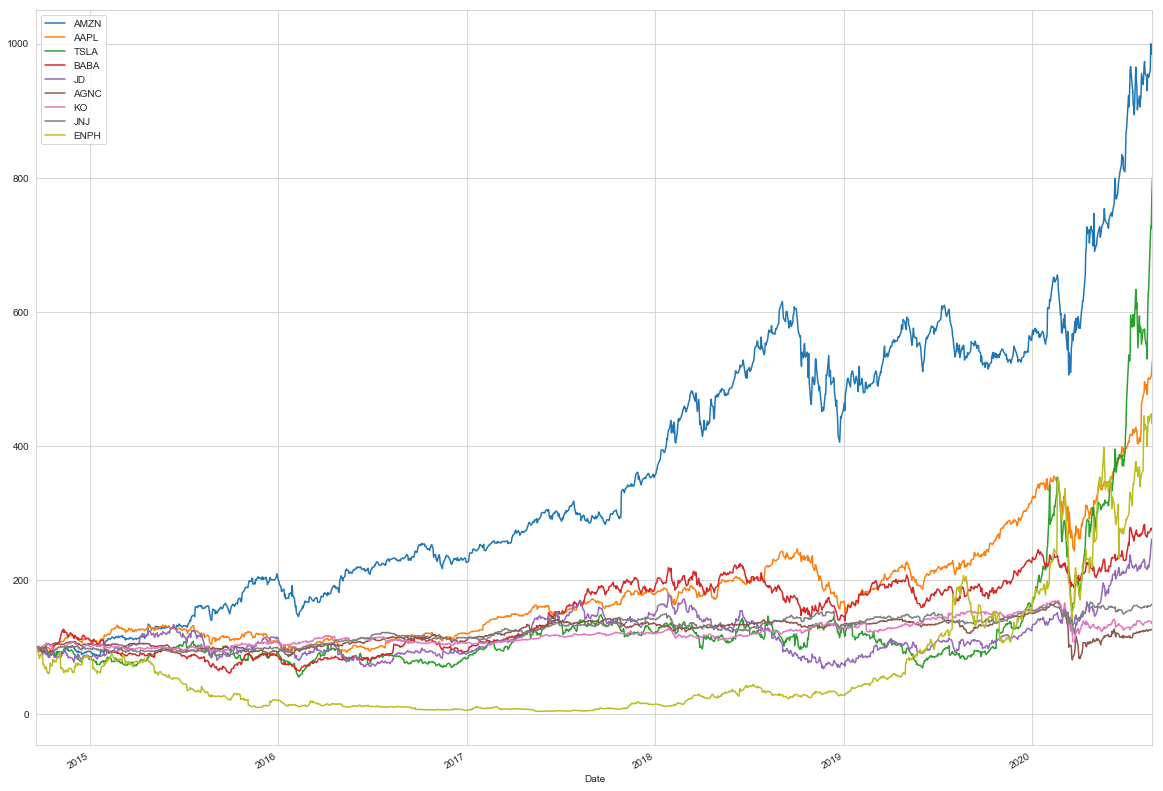

In [156]:
(historical_data/historical_data.iloc[0]*100).plot(figsize=(20,15))

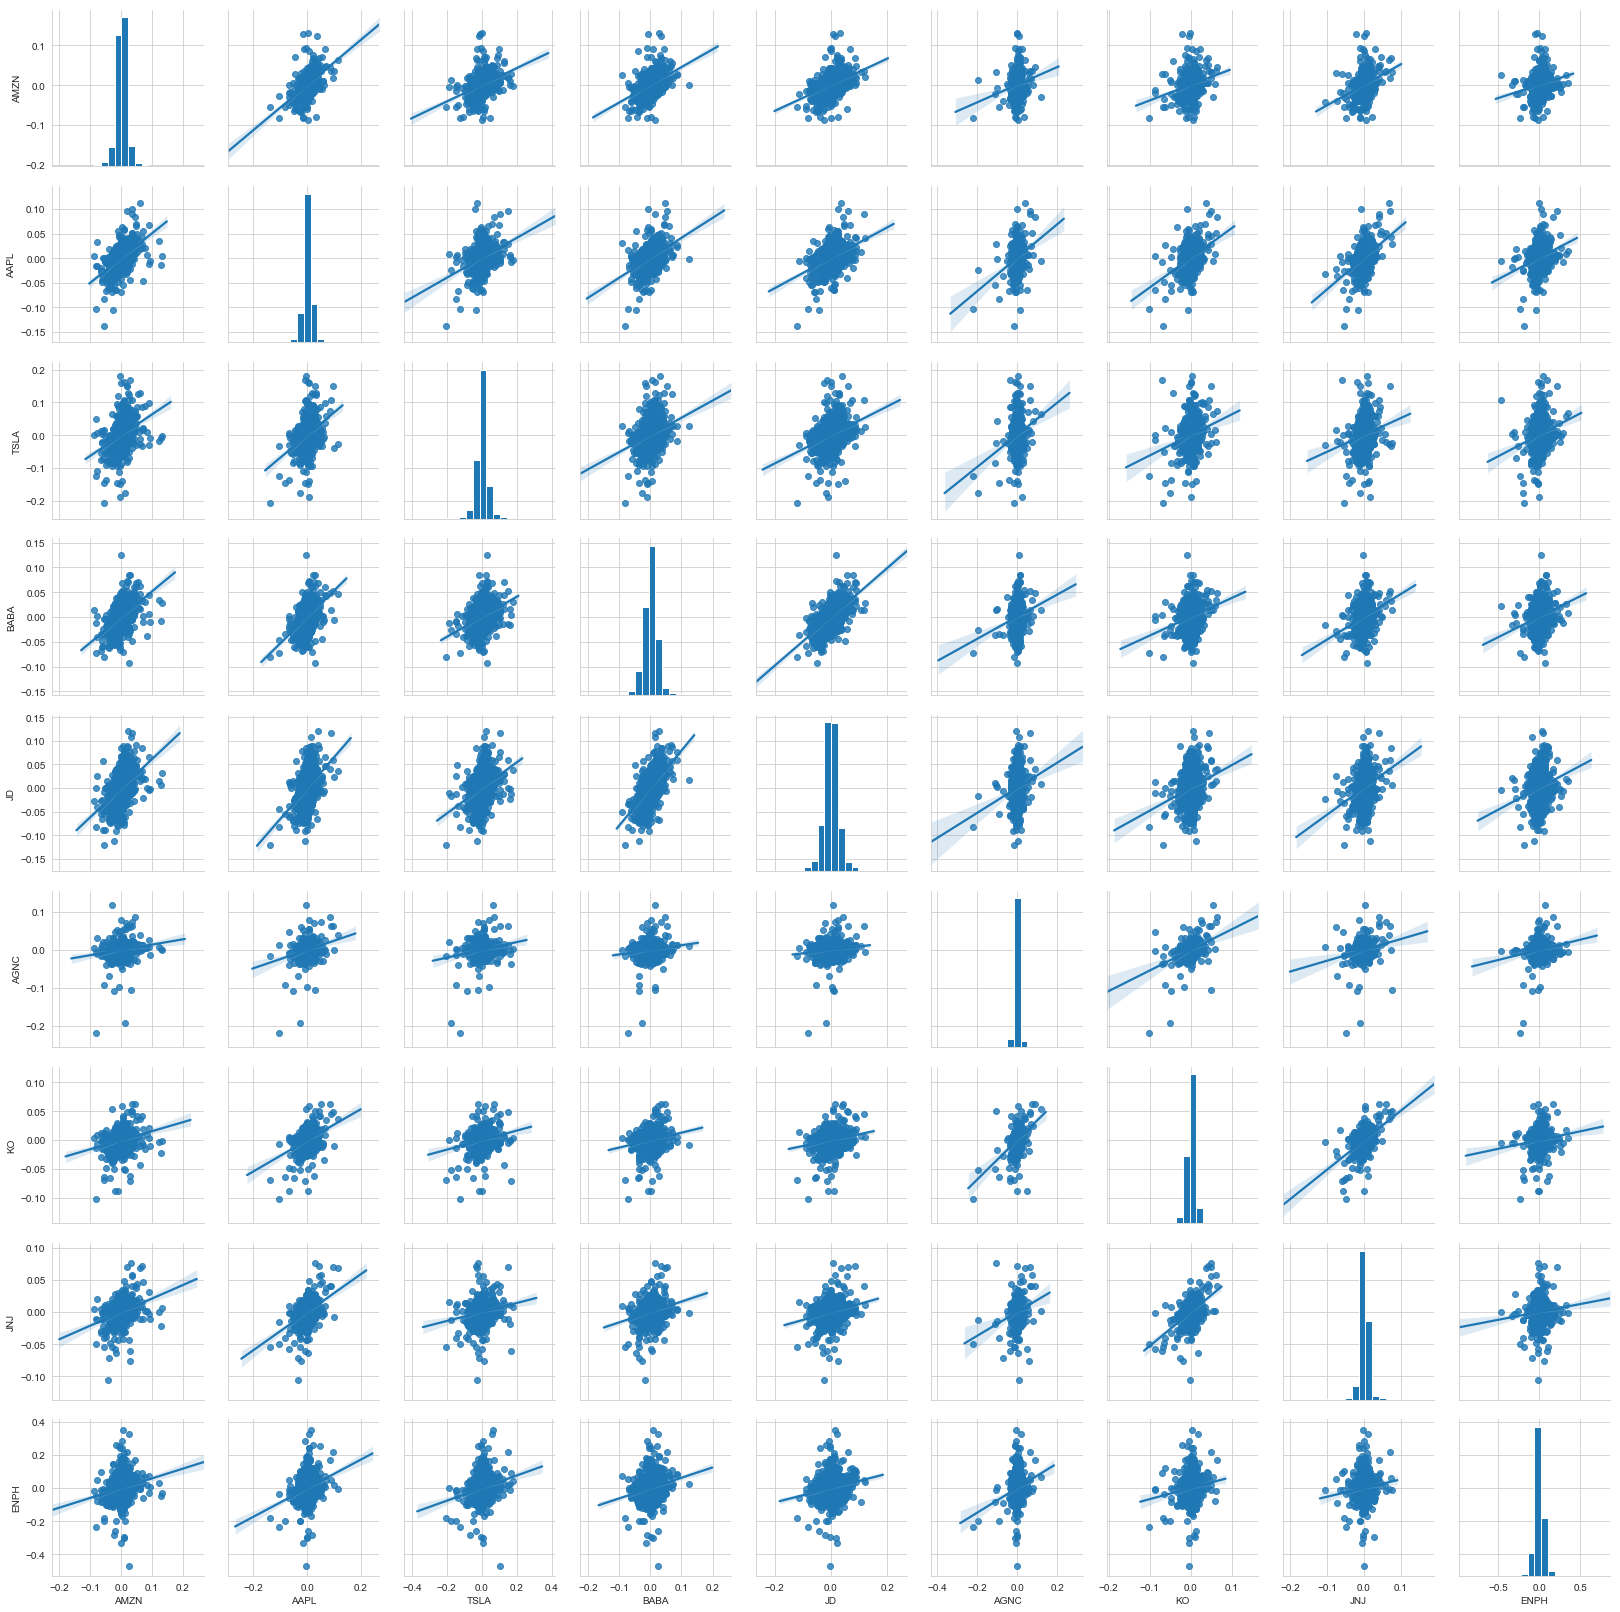

In [157]:
sns.set_style('whitegrid')
regression = sns.pairplot(returns[1:], kind="reg")
regression

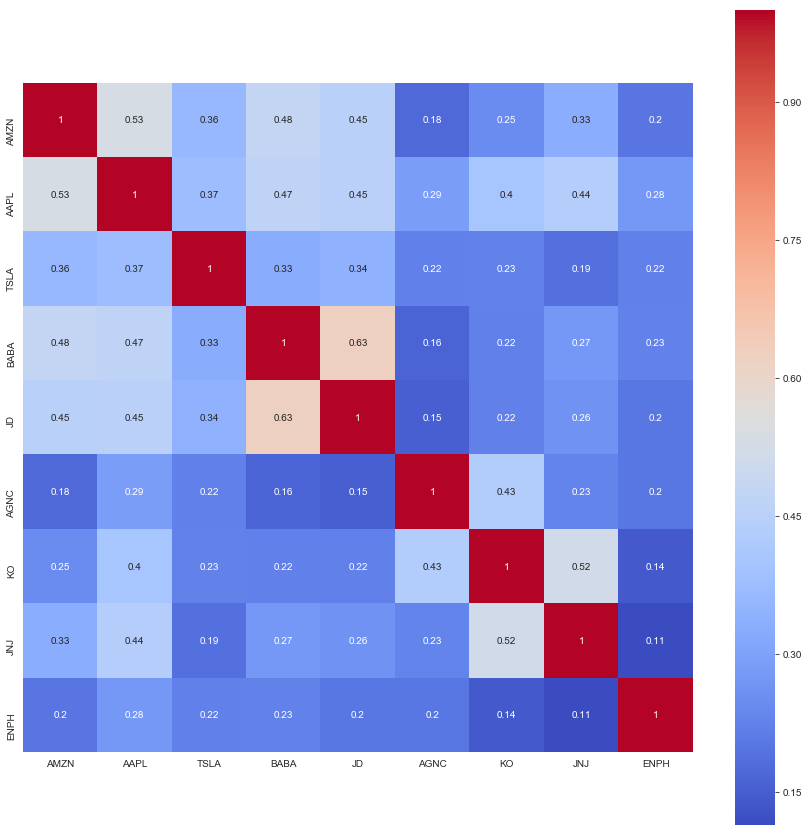

In [158]:
# Excatly -1: Perfect negative relationship 
# -0.70:      Strong negative relationship
# -0.50:      Moderate negative relationship
# -0.30:      Weak negative relationship
#  0.00:      No correlation
# +0.30:      Weak positive relationship
# +0.50:      Moderate positive relationship
# +0.70:      Strong positive relationship
# Exactly +1: Perfect positive relationship

plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(return_corr, annot=True, square=True, cmap='coolwarm')
heatmap
